In [1]:
import pandas as pd
%matplotlib inline

In [2]:
from pathlib import Path
csvpath = Path('../Resources/oil_futures_front.csv')
df = pd.read_csv(csvpath, parse_dates=True, index_col='Date')
df.head()

,Open,High,Low,Last,Change,Settle,Volume,Previous Day Open Interest
Date,,,,,,,,
2014-02-18,100.51,100.51,100.51,100.51,0.96,100.51,25.0,12833.0
2014-02-19,100.83,100.83,100.83,100.83,0.32,100.83,0.0,12833.0
2014-02-20,100.78,100.78,100.78,100.78,0.05,100.78,15.0,12833.0
2014-02-21,100.61,100.61,100.61,100.61,0.17,100.61,0.0,12833.0
2014-02-24,100.77,100.77,100.77,100.77,0.16,100.77,6.0,12833.0


<AxesSubplot:xlabel='Date'>

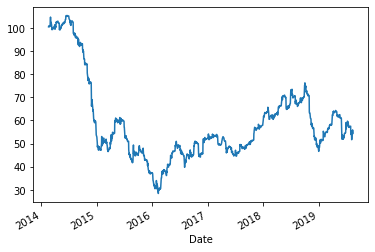

In [3]:
df.Settle.plot()

<AxesSubplot:xlabel='Date'>

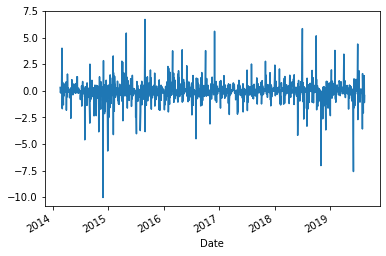

In [4]:
# Differencing the Settle price stationarizes the time series
df.Settle.diff().plot()

# Autocorrelation and Partial Autocorrelation Analysis

In [6]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

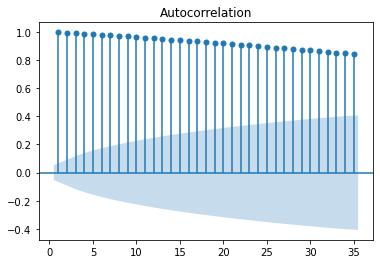

In [8]:
# Plot the autocorrelation of the Settle Prices
plotacf = plot_acf(df.Settle, zero=False, lags=35)

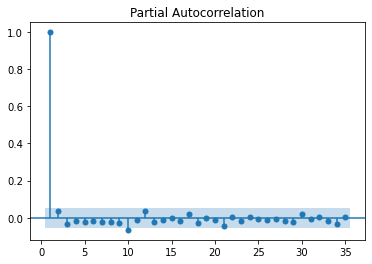

In [9]:
# Plot the partial autocorrelation of the returns
pacfplot = plot_pacf(df.Settle, zero=False, lags=35)

# ARIMA Model

In [15]:
from statsmodels.tsa.arima.model import ARIMA

In [16]:
# Create an ARIMA model
model = ARIMA(df.Settle.values, order=(1, 1, 1))

In [17]:
# Fit the model to the data
results = model.fit()

In [18]:
# Print the model summary
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1381
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1946.761
Date:                Mon, 22 Mar 2021   AIC                           3899.522
Time:                        18:47:01   BIC                           3915.211
Sample:                             0   HQIC                          3905.391
                               - 1381                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4524      0.249     -1.816      0.069      -0.941       0.036
ma.L1          0.3717      0.256      1.454      0.146      -0.129       0.873
sigma2         0.9837      0.012     84.004      0.000       0.961       1.007
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):             19999.51
Prob(Q):                              0.87   Prob(JB):                         0.00
Heteroskedasticity (H):               0.78   Skew:                            -0.94
Prob(H) (two-sided):                  0.01   Kurtosis:                        21.56
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<AxesSubplot:title={'center':'Futures Forecast'}>

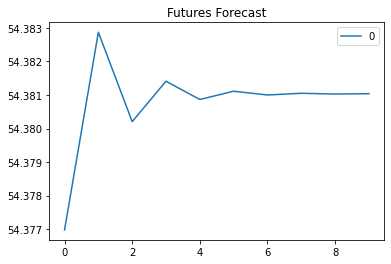

In [20]:
# Plot the Futures Price Forecast
pd.DataFrame(results.forecast(steps=10)).plot(title="Futures Forecast")

# ARIMA Model using a Lag of 2

In [21]:
# Create an ARIMA Model and fit it to the data
model2 = ARIMA(df.Settle.values, order=(2, 1, 1))
results2 = model2.fit()

In [22]:
# print the model summary
results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1381
Model:                 ARIMA(2, 1, 1)   Log Likelihood               -1939.528
Date:                Mon, 22 Mar 2021   AIC                           3887.056
Time:                        18:48:27   BIC                           3907.976
Sample:                             0   HQIC                          3894.882
                               - 1381                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8314      0.040     20.714      0.000       0.753       0.910
ar.L2          0.1169      0.025      4.718      0.000       0.068       0.165
ma.L1         -0.9181      0.031    -29.236      0.000      -0.980      -0.857
sigma2         0.9733      0.012     80.713      0.000       0.950       0.997
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             19830.89
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               0.80   Skew:                            -0.88
Prob(H) (two-sided):                  0.02   Kurtosis:                        21.49
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<AxesSubplot:title={'center':'Futures Forecast'}>

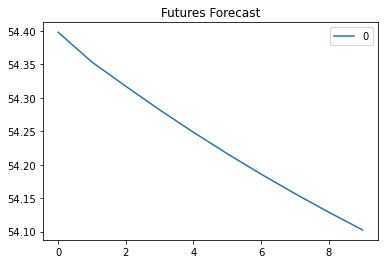

In [23]:
# Plot the Futures Price Forecast
pd.DataFrame(results2.forecast(steps=10)).plot(title="Futures Forecast")